In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v2_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v2_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Photon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo1DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/V2/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [6]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'eCorr', 'energyErr', 'eta', 'hoe', 'mass', 'mvaID', 'mvaID_Fall17V1p1', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'sieie', 'charge', 'cutBased', 'cutBased_Fall17V1Bitmap', 'electronIdx', 'jetIdx', 'pdgId', 'vidNestedWPBitmap', 'electronVeto', 'isScEtaEB', 'isScEtaEE', 'mvaID_WP80', 'mvaID_WP90', 'pixelSeed', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'electronIdxG', 'genPartIdxG', 'jetIdxG']


# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [1.95], [], [], [], [1.38], [], [0.119]]
2mu2e eta structure: [[-0.31, -0.278], [-1.66, -1.72], [-0.0543, ... -0.135], [1.17], [0.143, 0.0984]]
4mu eta structure: [[], [], [], [], [], [], [-1.07], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e eta structure: [[1.41, 1.37], [-0.0929, -0.0132], [-0.41, ... 0.956], [-0.538, -0.506], [1.55, 1.6]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [], [], [1.31], [], [-0.0146], [], [0.106]]
2mu2e eta structure: [[1.3, 1.26], [0.584, 0.511], [-1.74], ... 0.917], [-1.5, -1.59], [0.864, 0.814]]
4mu eta structure: [[], [-0.837], [-0.524, 0.148], [], [], [], ... [], [], [], [-1.56], [], [], []]
2mu2e eta structure: [[2.48], [0.181], [], [], [], ... [0.456, 0.49, -2.49], [], [-0.223, -0.247]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [1.93], [], []]
2mu2e eta structure: [[], [], [], [-1.91, -2.18], [-1.67], ... -2.31], [-1.58]

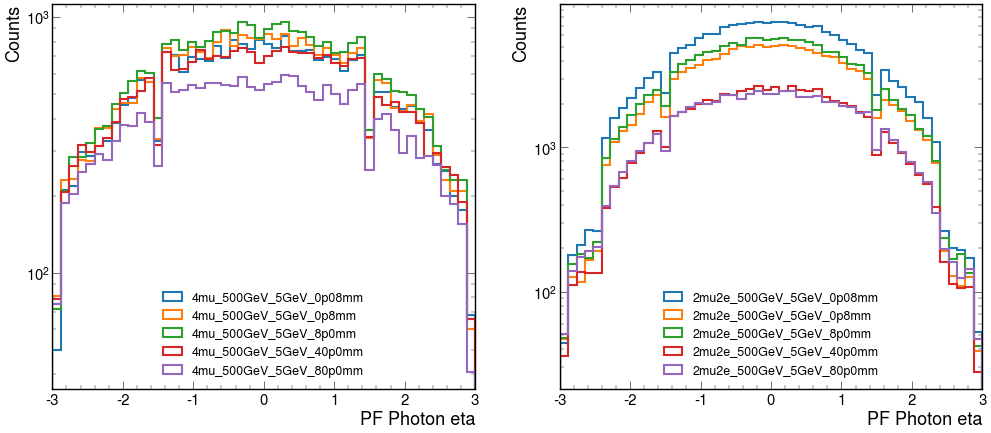

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Photon eta')
ax[1].set_xlabel('PF Photon eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/eta.png", bbox_inches="tight")

4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [1.95], [], [], [], [1.38], [], [0.119]]
2mu2e eta structure: [[-0.31, -0.278], [-1.66, -1.72], [-0.0543, ... -0.135], [1.17], [0.143, 0.0984]]
4mu eta structure: [[], [], [], [], [], [], [-1.07], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e eta structure: [[1.41, 1.37], [-0.0929, -0.0132], [-0.41, ... 0.956], [-0.538, -0.506], [1.55, 1.6]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [], [], [1.31], [], [-0.0146], [], [0.106]]
2mu2e eta structure: [[1.3, 1.26], [0.584, 0.511], [-1.74], ... 0.917], [-1.5, -1.59], [0.864, 0.814]]
4mu eta structure: [[], [-0.837], [-0.524, 0.148], [], [], [], ... [], [], [], [-1.56], [], [], []]
2mu2e eta structure: [[2.48], [0.181], [], [], [], ... [0.456, 0.49, -2.49], [], [-0.223, -0.247]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [1.93], [], []]
2mu2e eta structure: [[], [], [], [-1.91, -2.18], [-1.67], ... -2.31], [-1.58]

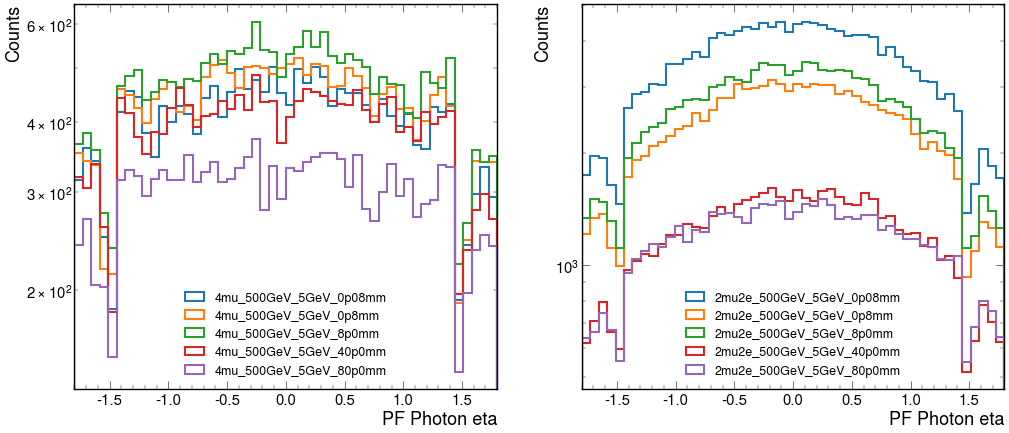

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-1.8,1.8), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-1.8,1.8), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-1.8,1.8)
ax[1].set_xlim(-1.8,1.8)
ax[0].set_xlabel('PF Photon eta')
ax[1].set_xlabel('PF Photon eta')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/eta_low.png", bbox_inches="tight")

## mass

4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [0], [], [0]]
2mu2e mass structure: [[0, 0], [0, 0], [0], [0], [0, 0], [0], ... [0], [0, 0], [0], [0, 0], [0], [0, 0]]
4mu mass structure: [[], [], [], [], [], [], [0], [], [], [], ... 0], [], [], [], [], [], [], [], [], []]
2mu2e mass structure: [[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], ... [0, 0], [0], [0, 0], [0, 0], [0, 0]]
4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... 0, 0], [], [], [0], [], [0], [], [0]]
2mu2e mass structure: [[0, 0], [0, 0], [0], [0], [0, 0], [0, 0, ... [0, 0, 0], [0], [0, 0], [0, 0], [0, 0]]
4mu mass structure: [[], [0], [0, 0], [], [], [], [], [], [], ... [0], [], [], [], [], [0], [], [], []]
2mu2e mass structure: [[0], [0], [], [], [], [], [0, 0], [], ... [0], [0], [0], [0, 0, 0], [], [0, 0]]
4mu mass structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0], [], []]
2mu2e mass structure: [[], [], [], [0, 0], [0], [0], [0, 0], [], 

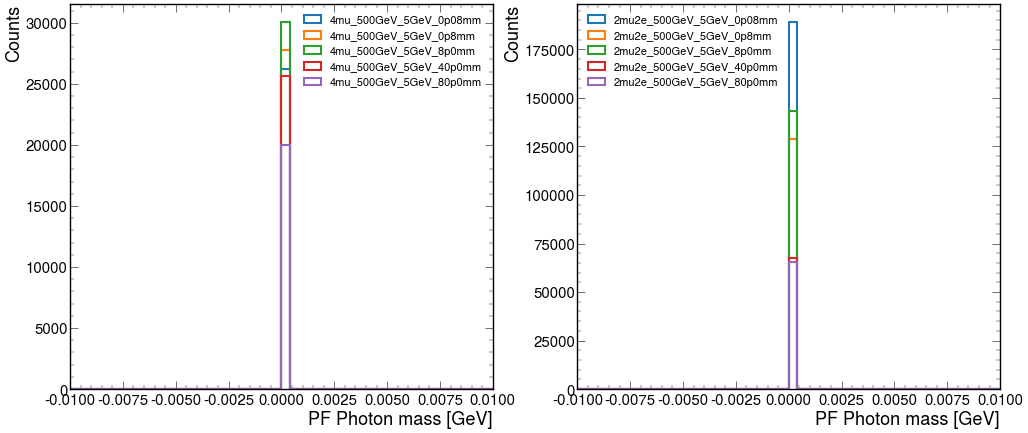

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(-0.01,0.01), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(-0.01,0.01), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-0.01,0.01)
ax[1].set_xlim(-0.01,0.01)
ax[0].set_xlabel('PF Photon mass [GeV]')
ax[1].set_xlabel('PF Photon mass [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/V2/PF_PHOTON/Basic/mass.png", bbox_inches="tight")

## phi

4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [-0.875], [], [], [], [2.3], [], [-1.04]]
2mu2e phi structure: [[-1.01, -1.05], [-0.475, -0.47], [-2.42], ... [-1.71, -1.77], [-2.37], [1.74, 1.67]]
4mu phi structure: [[], [], [], [], [], [], [-0.807], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e phi structure: [[-1.97, -2.01], [-2.88, -2.91], [1.52, ... -0.572], [2.84, 2.88], [-0.688, -0.716]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [], [], [-3.14], [], [1.25], [], [-1.86]]
2mu2e phi structure: [[1.48, 1.48], [-1.54, -1.62], [-0.599], ... -1.41], [-1.5, -1.58], [-0.818, -0.822]]
4mu phi structure: [[], [-1.97], [2.5, -2.44], [], [], [], [], ... [], [], [], [], [0.15], [], [], []]
2mu2e phi structure: [[2.61], [2.6], [], [], [], ... [-0.752, -0.765, 2.99], [], [0.531, 0.596]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [-2.17], [], []]
2mu2e phi structure: [[], [], [], [2.16, 1.24], [0.548], ... -2.41], 

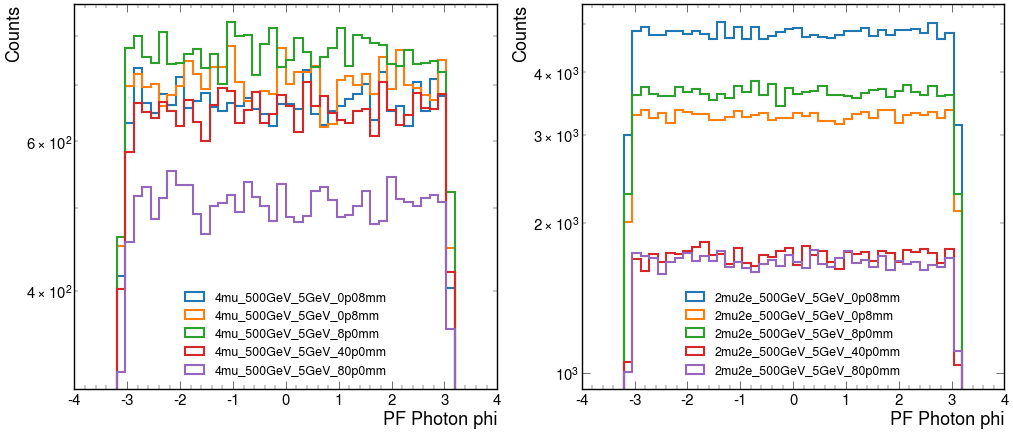

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Photon phi')
ax[1].set_xlabel('PF Photon phi')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18, loc='lower center')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [57.3], [], [], [], [54.7], [], [11.6]]
2mu2e pt structure: [[106, 103], [167, 66.2], [270], [239], ... [185], [202, 51], [172], [133, 68.5]]
4mu pt structure: [[], [], [], [], [], [], [15.4], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e pt structure: [[149, 113], [180, 19.1], [236, 11.2], ... [145, 22.1], [227, 144], [170, 52.7]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [], [], [241], [], [13.9], [], [82.6]]
2mu2e pt structure: [[184, 67.9], [227, 15.6], [204], [252], ... [138, 50.7], [87, 18.4], [204, 33.5]]
4mu pt structure: [[], [19.8], [34.3, 13.4], [], [], [], [], ... [], [], [], [], [103], [], [], []]
2mu2e pt structure: [[16.9], [17.6], [], [], [], [], ... [227], [301, 89.3, 10.1], [], [220, 39.3]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [23.2], [], []]
2mu2e pt structure: [[], [], [], [220, 37.5], [144], [303], [262, ... [], [15], [171], [], [], 

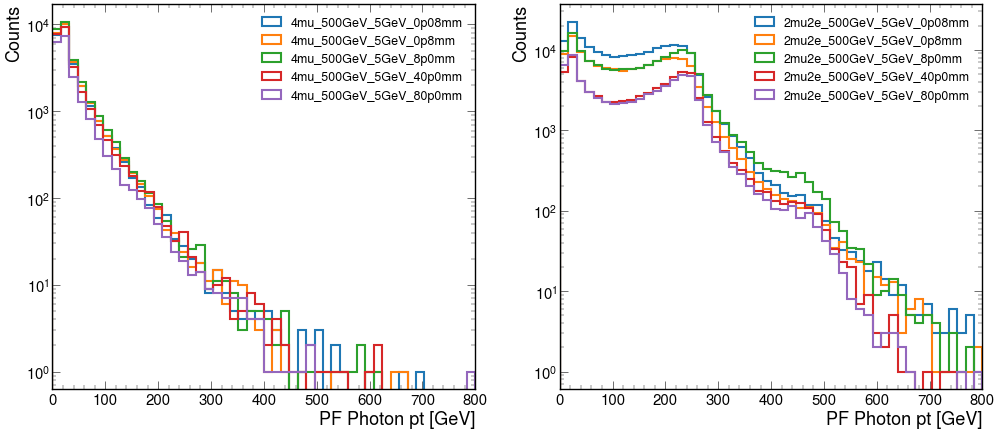

In [15]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,800), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,800)
ax[1].set_xlim(0,800)
ax[0].set_xlabel('PF Photon pt [GeV]')
ax[1].set_xlabel('PF Photon pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/pt.png", bbox_inches="tight")

4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [57.3], [], [], [], [54.7], [], [11.6]]
2mu2e pt structure: [[106, 103], [167, 66.2], [270], [239], ... [185], [202, 51], [172], [133, 68.5]]
4mu pt structure: [[], [], [], [], [], [], [15.4], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e pt structure: [[149, 113], [180, 19.1], [236, 11.2], ... [145, 22.1], [227, 144], [170, 52.7]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [], [], [241], [], [13.9], [], [82.6]]
2mu2e pt structure: [[184, 67.9], [227, 15.6], [204], [252], ... [138, 50.7], [87, 18.4], [204, 33.5]]
4mu pt structure: [[], [19.8], [34.3, 13.4], [], [], [], [], ... [], [], [], [], [103], [], [], []]
2mu2e pt structure: [[16.9], [17.6], [], [], [], [], ... [227], [301, 89.3, 10.1], [], [220, 39.3]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [23.2], [], []]
2mu2e pt structure: [[], [], [], [220, 37.5], [144], [303], [262, ... [], [15], [171], [], [], 

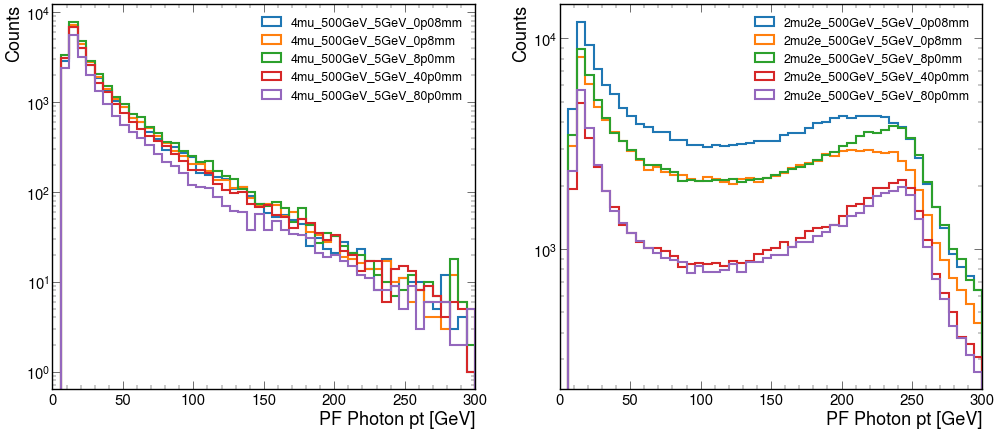

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,300)
ax[1].set_xlim(0,300)
ax[0].set_xlabel('PF Photon pt [GeV]')
ax[1].set_xlabel('PF Photon pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/pt_low.png", bbox_inches="tight")

4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [57.3], [], [], [], [54.7], [], [11.6]]
2mu2e pt structure: [[106, 103], [167, 66.2], [270], [239], ... [185], [202, 51], [172], [133, 68.5]]
4mu pt structure: [[], [], [], [], [], [], [15.4], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e pt structure: [[149, 113], [180, 19.1], [236, 11.2], ... [145, 22.1], [227, 144], [170, 52.7]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [], [], [241], [], [13.9], [], [82.6]]
2mu2e pt structure: [[184, 67.9], [227, 15.6], [204], [252], ... [138, 50.7], [87, 18.4], [204, 33.5]]
4mu pt structure: [[], [19.8], [34.3, 13.4], [], [], [], [], ... [], [], [], [], [103], [], [], []]
2mu2e pt structure: [[16.9], [17.6], [], [], [], [], ... [227], [301, 89.3, 10.1], [], [220, 39.3]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [23.2], [], []]
2mu2e pt structure: [[], [], [], [220, 37.5], [144], [303], [262, ... [], [15], [171], [], [], 

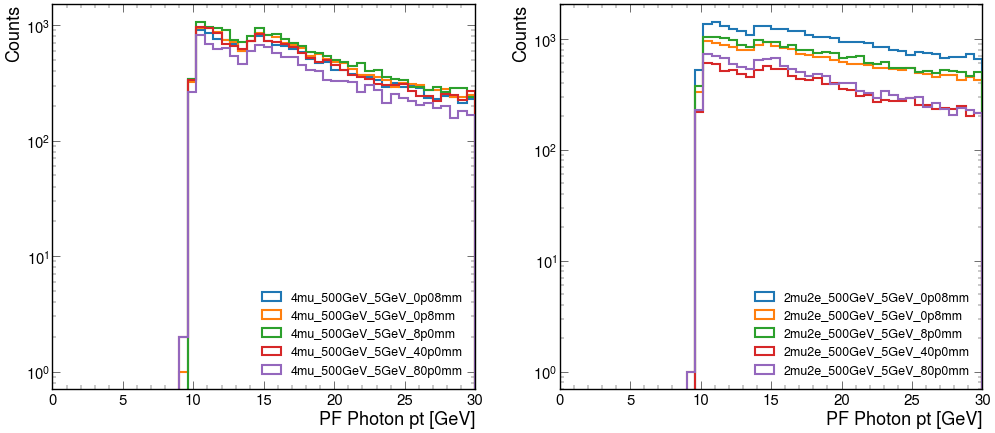

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('PF Photon pt [GeV]')
ax[1].set_xlabel('PF Photon pt [GeV]')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/pt_superlow.png", bbox_inches="tight")

## sieie

4mu sieie structure: [[], [], [], [], [], [], [], [], ... 0.0261], [], [], [], [0.0115], [], [0.00995]]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], [0.0113, ... 0.0106], [0.01], [0.00929, 0.02]]
4mu sieie structure: [[], [], [], [], [], [], [0.00884], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... [0.0184, 0.0137], [0.0383, 0.0569]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [0.016], [], [0.0127], [], [0.0179]]
2mu2e sieie structure: [[0.0171, 0.0154], [0.00937, 0.0132], ... [0.00479, 0.0221], [0.00928, 0.00928]]
4mu sieie structure: [[], [0.00907], [0.00957, 0.0178], [], [], [], ... [], [], [], [0.0222], [], [], []]
2mu2e sieie structure: [[0.0456], [0.0141], [], [], [], ... [0.0171, 0.0163, 0.0382], [], [0.0095, 0.0122]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.0385], [], []]
2mu2e sieie structure: [[], [], [], [0.0226, 0.0437], [0

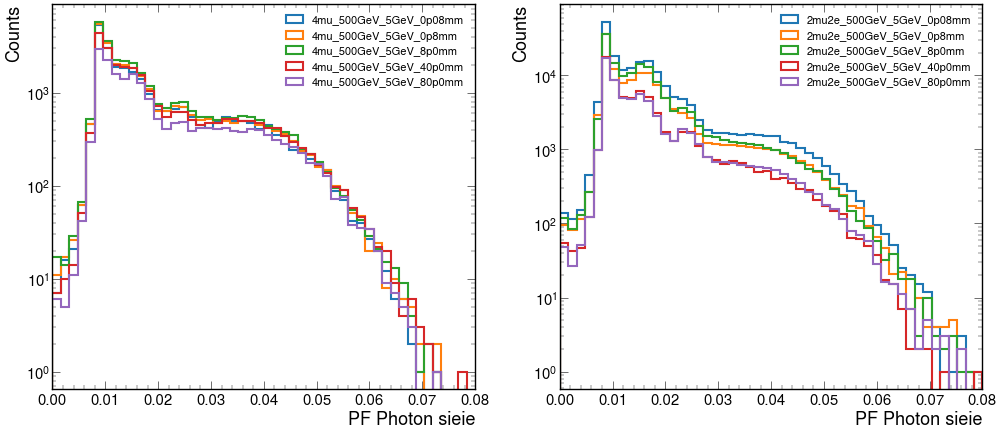

In [21]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,0.08)
ax[1].set_xlim(0,0.08)
ax[0].set_xlabel('PF Photon sieie')
ax[1].set_xlabel('PF Photon sieie')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/sieie.png", bbox_inches="tight")

4mu sieie structure: [[], [], [], [], [], [], [], [], ... 0.0261], [], [], [], [0.0115], [], [0.00995]]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], [0.0113, ... 0.0106], [0.01], [0.00929, 0.02]]
4mu sieie structure: [[], [], [], [], [], [], [0.00884], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... [0.0184, 0.0137], [0.0383, 0.0569]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [0.016], [], [0.0127], [], [0.0179]]
2mu2e sieie structure: [[0.0171, 0.0154], [0.00937, 0.0132], ... [0.00479, 0.0221], [0.00928, 0.00928]]
4mu sieie structure: [[], [0.00907], [0.00957, 0.0178], [], [], [], ... [], [], [], [0.0222], [], [], []]
2mu2e sieie structure: [[0.0456], [0.0141], [], [], [], ... [0.0171, 0.0163, 0.0382], [], [0.0095, 0.0122]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.0385], [], []]
2mu2e sieie structure: [[], [], [], [0.0226, 0.0437], [0

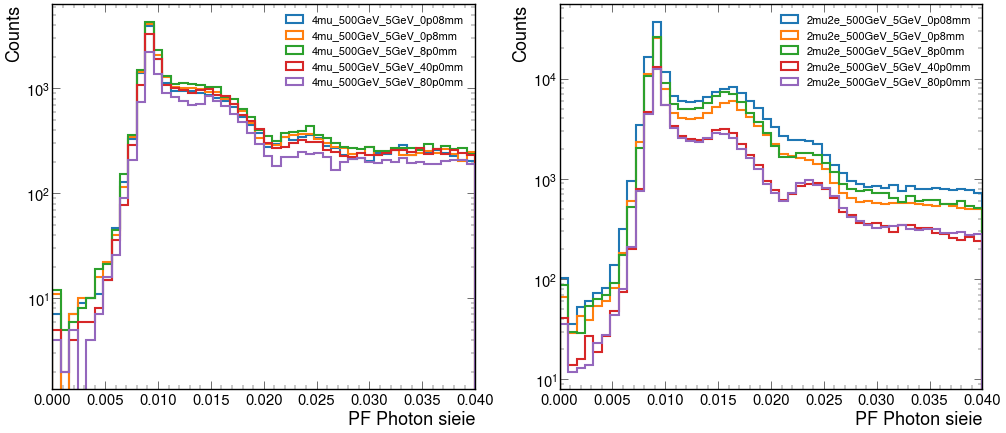

In [22]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.04), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.04), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,0.04)
ax[1].set_xlim(0,0.04)
ax[0].set_xlabel('PF Photon sieie')
ax[1].set_xlabel('PF Photon sieie')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/sieie_low.png", bbox_inches="tight")

4mu sieie structure: [[], [], [], [], [], [], [], [], ... 0.0261], [], [], [], [0.0115], [], [0.00995]]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], [0.0113, ... 0.0106], [0.01], [0.00929, 0.02]]
4mu sieie structure: [[], [], [], [], [], [], [0.00884], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... [0.0184, 0.0137], [0.0383, 0.0569]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [0.016], [], [0.0127], [], [0.0179]]
2mu2e sieie structure: [[0.0171, 0.0154], [0.00937, 0.0132], ... [0.00479, 0.0221], [0.00928, 0.00928]]
4mu sieie structure: [[], [0.00907], [0.00957, 0.0178], [], [], [], ... [], [], [], [0.0222], [], [], []]
2mu2e sieie structure: [[0.0456], [0.0141], [], [], [], ... [0.0171, 0.0163, 0.0382], [], [0.0095, 0.0122]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.0385], [], []]
2mu2e sieie structure: [[], [], [], [0.0226, 0.0437], [0

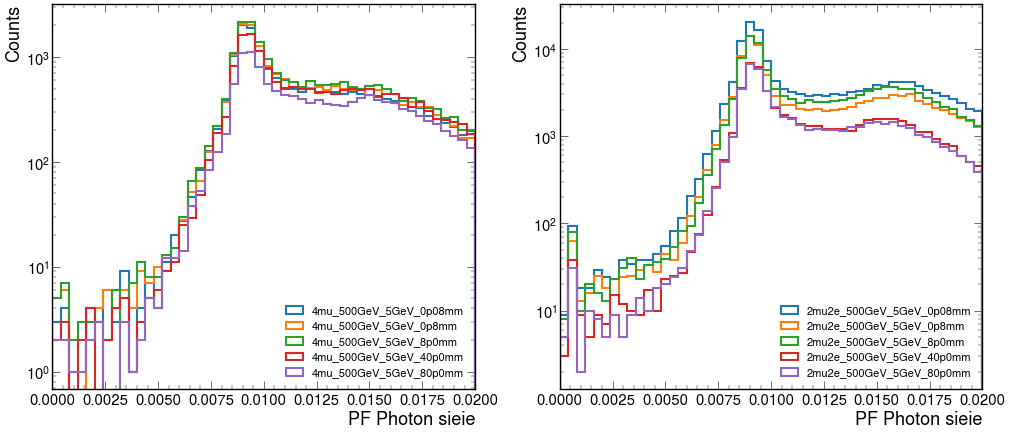

In [23]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.02), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.02), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,0.02)
ax[1].set_xlim(0,0.02)
ax[0].set_xlabel('PF Photon sieie')
ax[1].set_xlabel('PF Photon sieie')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/sieie_superlow.png", bbox_inches="tight")

## r9

4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.774], [], [], [], [0.646], [], [0.998]]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.948, 0.948], [0.585], [0.911, 0.985]]
4mu r9 structure: [[], [], [], [], [], [], [0.835], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.321], [0.965, 0.882], [0.85, 0.94]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [], [], [0.624], [], [0.841], [], [0.534]]
2mu2e r9 structure: [[0.862, 1.02], [0.968, 0.506], [0.585], ... 0.962], [0.935, 0.637], [0.962, 6.75]]
4mu r9 structure: [[], [0.994], [0.989, 1.04], [], [], [], [], ... [], [], [], [], [0.98], [], [], []]
2mu2e r9 structure: [[0.639], [0.477], [], [], [], ... 0.877], [0.978, 1.05, 1.14], [], [0.971, 6.07]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.822], [], []]
2mu2e r9 structure: [[], [], [], [0.964, 0.838], [0.963], ... 0.522], [0.9

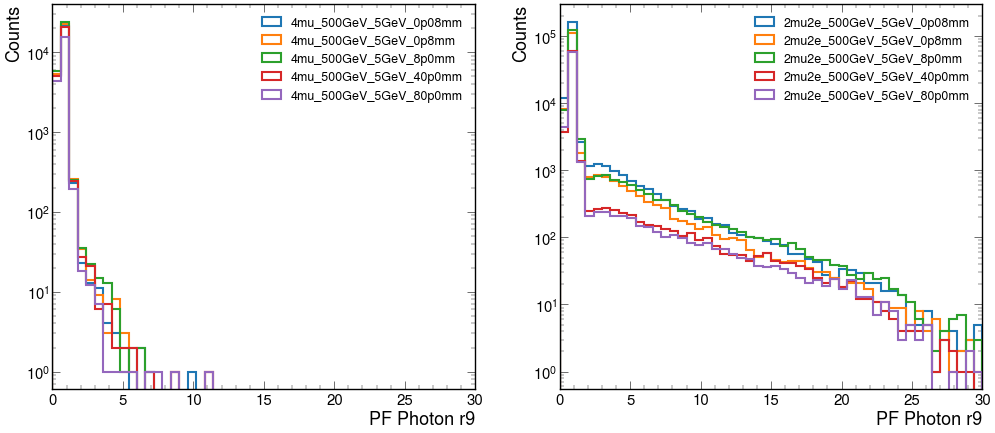

In [25]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,30), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('PF Photon r9')
ax[1].set_xlabel('PF Photon r9')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/r9.png", bbox_inches="tight")

4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.774], [], [], [], [0.646], [], [0.998]]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.948, 0.948], [0.585], [0.911, 0.985]]
4mu r9 structure: [[], [], [], [], [], [], [0.835], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.321], [0.965, 0.882], [0.85, 0.94]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [], [], [0.624], [], [0.841], [], [0.534]]
2mu2e r9 structure: [[0.862, 1.02], [0.968, 0.506], [0.585], ... 0.962], [0.935, 0.637], [0.962, 6.75]]
4mu r9 structure: [[], [0.994], [0.989, 1.04], [], [], [], [], ... [], [], [], [], [0.98], [], [], []]
2mu2e r9 structure: [[0.639], [0.477], [], [], [], ... 0.877], [0.978, 1.05, 1.14], [], [0.971, 6.07]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.822], [], []]
2mu2e r9 structure: [[], [], [], [0.964, 0.838], [0.963], ... 0.522], [0.9

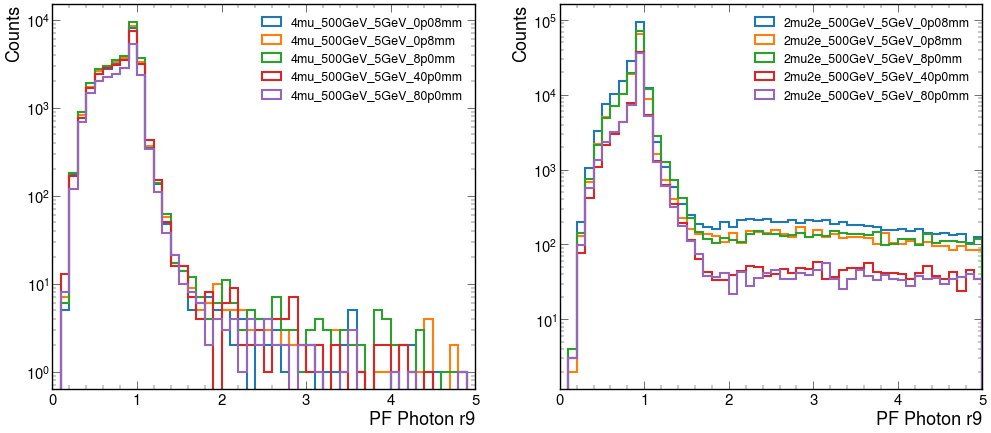

In [26]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,5), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('PF Photon r9')
ax[1].set_xlabel('PF Photon r9')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/r9_low.png", bbox_inches="tight")

4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.774], [], [], [], [0.646], [], [0.998]]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.948, 0.948], [0.585], [0.911, 0.985]]
4mu r9 structure: [[], [], [], [], [], [], [0.835], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.321], [0.965, 0.882], [0.85, 0.94]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [], [], [0.624], [], [0.841], [], [0.534]]
2mu2e r9 structure: [[0.862, 1.02], [0.968, 0.506], [0.585], ... 0.962], [0.935, 0.637], [0.962, 6.75]]
4mu r9 structure: [[], [0.994], [0.989, 1.04], [], [], [], [], ... [], [], [], [], [0.98], [], [], []]
2mu2e r9 structure: [[0.639], [0.477], [], [], [], ... 0.877], [0.978, 1.05, 1.14], [], [0.971, 6.07]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [0.822], [], []]
2mu2e r9 structure: [[], [], [], [0.964, 0.838], [0.963], ... 0.522], [0.9

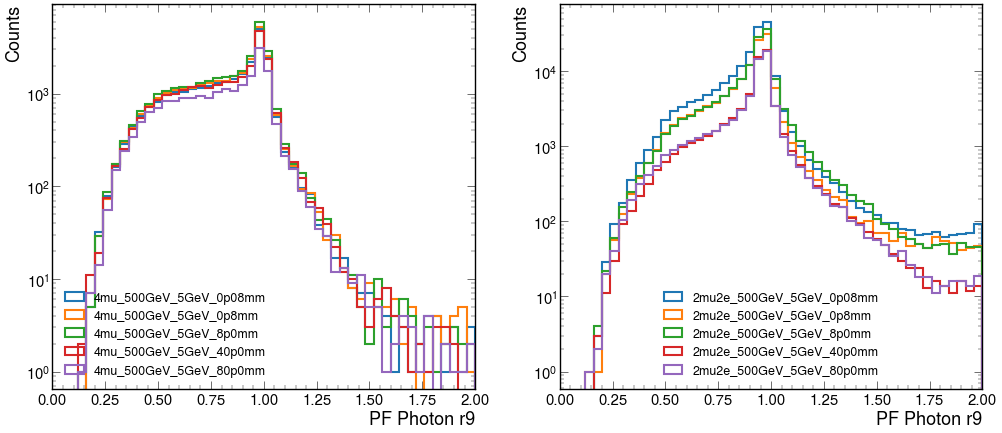

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)

ax[0].set_xlim(0,2)
ax[1].set_xlim(0,2)
ax[0].set_xlabel('PF Photon r9')
ax[1].set_xlabel('PF Photon r9')
ax[0].set_ylabel('Counts')
ax[1].set_ylabel('Counts')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/V2/PF_PHOTON/Basic/r9_superlow.png", bbox_inches="tight")